In [11]:
import pandas as pd
import numpy as np
from datetime import datetime
import math
import logging

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler, Normalizer
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer

from mlxtend.preprocessing import DenseTransformer
from mlxtend.feature_selection import ColumnSelector

In [5]:
logger = logging.getLogger('ai')
logging.basicConfig(level=logging.DEBUG,
                    format='%(asctime)s  %(filename)s : %(levelname)s  %(message)s')

## 模型

+ [sklearn.preprocessing.StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
+ [Feature transformations with ensembles of trees](https://scikit-learn.org/stable/auto_examples/ensemble/plot_feature_transformation.html)
+ [sklearn.preprocessing.OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)
+ [机器学习之 sklearn中的pipeline](http://frankchen.xyz/2018/04/08/pipeline-in-machine-learning/)
    - 使用pipeline做cross validation
    - 自定义transformer
    - FeatureUnion
+ [Concatenating multiple feature extraction methods](https://scikit-learn.org/stable/auto_examples/compose/plot_feature_union.html#sphx-glr-auto-examples-compose-plot-feature-union-py)
+ [sklearn.pipeline.Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html)
+ [gbdt+lr demo](https://github.com/princewen/tensorflow_practice/blob/master/recommendation/GBDT%2BLR-Demo/GBDT_LR.py)
+ [推荐系统遇上深度学习(十)--GBDT+LR融合方案实战](https://zhuanlan.zhihu.com/p/37522339)
+ [python︱sklearn一些小技巧的记录（训练集划分/pipelline/交叉验证等）](https://blog.csdn.net/sinat_26917383/article/details/77917881)
+ [16.【进阶】特征提升之特征筛选----feature_selection](https://blog.csdn.net/jh1137921986/article/details/79822512)
+ [使用sklearn优雅地进行数据挖掘](https://www.cnblogs.com/jasonfreak/p/5448462.html)
+ [Kaggle机器学习之模型融合（stacking）心得](https://zhuanlan.zhihu.com/p/26890738)

In [6]:
continous = [
    'Discount',
    'Previous_duration',
    'Next_duration',
    'Base_consume',
    'User_receive_count',
    'User_consume_count',
    'User_used_count',
    'User_not_used_count',
    'User_used_coupon_rate',
    'User_used_coupon_rate_max',
    'User_used_coupon_rate_min',
    'User_used_coupon_rate_mean',
    'User_receive_coupon_merchant_count',
    'User_consume_merchant_count',
    'User_used_coupon_merchant_count',
    'User_used_coupon_merchant_occ',
    'User_receive_different_coupon_count',
    'User_used_different_coupon_count',
    'User_receive_different_coupon_occ',
    'User_used_different_coupon_occ',
    'User_receive_coupon_mean',
    'User_used_coupon_mean',
    'User_distance_used_mean',
    'User_distance_used_max',
    'User_distance_used_min',
    'User_duration_used_mean',
    'User_duration_used_max',
    'User_duration_used_min',
    'User_previous_duration_used_mean',
    'User_previous_duration_used_max',
    'User_previous_duration_used_min',
    'User_next_duration_used_mean',
    'User_next_duration_used_max',
    'User_next_duration_used_min',
    'Merchant_receive_count',
    'Merchant_consume_count',
    'Merchant_used_count',
    'Merchant_not_used_count',
    'Merchant_used_coupon_rate',
    'Merchant_used_coupon_rate_max',
    'Merchant_used_coupon_rate_min',
    'Merchant_used_coupon_rate_mean',
    'Merchant_receive_coupon_user_count',
    'Merchant_consume_user_count',
    'Merchant_used_coupon_user_count',
    'Merchant_receive_coupon_user_occ',
    'Merchant_consume_user_occ',
    'Merchant_used_coupon_user_occ',
    'Merchant_receive_different_coupon_count',
    'Merchant_used_different_coupon_count',
    'Merchant_receive_different_coupon_occ',
    'Merchant_used_different_coupon_occ',
    'Merchant_receive_coupon_mean',
    'Merchant_used_coupon_mean',
    'Merchant_receive_different_coupon_avg',
    'Merchant_used_different_coupon_avg',
    'Merchant_distance_used_mean',
    'Merchant_distance_used_max',
    'Merchant_distance_used_min',
    'Merchant_duration_used_mean',
    'Merchant_duration_used_max',
    'Merchant_duration_used_min',
    'Merchant_previous_duration_used_mean',
    'Merchant_previous_duration_used_max',
    'Merchant_previous_duration_used_min',
    'Merchant_next_duration_used_mean',
    'Merchant_next_duration_used_max',
    'Merchant_next_duration_used_min',
    'Coupon_received_count',
    'Coupon_used_count',
    'Coupon_used_rate',
    'Coupon_duration_used_mean',
    'Coupon_duration_used_max',
    'Coupon_duration_used_min',
    'Coupon_distance_used_mean',
    'Coupon_distance_used_max',
    'Coupon_distance_used_min',
    'User_merchant_receive_count',
    'User_merchant_consume_count',
    'User_merchant_used_count',
    'User_merchant_not_used_count',
    'User_merchant_used_coupon_rate',
    'User_merchant_not_used_coupon_rate',
    'User_merchant_used_coupon_rate_4_merchant',
    'User_merchant_not_used_coupon_rate_4_merchant',
    'User_merchant_duration_used_mean',
    'User_merchant_duration_used_max',
    'User_merchant_duration_used_min',
    'Online_user_receive_count',
    'Online_user_consume_count',
    'Online_user_used_count',
    'Online_user_not_used_count',
    'Online_user_used_coupon_rate',
    'User_offline_consume_rate',
    'User_offline_used_rate',
    'User_offline_no_consume_coupon_rate',
    'User_distance_receive_count',
    'User_distance_consume_count',
    'User_distance_used_count',
    'User_distance_receive_rate',
    'User_distance_consume_rate',
    'User_distance_used_rate',
    'User_coupon_type_receive_count',
    'User_coupon_type_used_count',
    'User_coupon_type_receive_rate',
    'User_coupon_type_used_rate',
    'User_coupon_receive_count',
    'User_coupon_used_count',
    'User_coupon_receive_rate',
    'User_coupon_used_rate',
    'Merchant_distance_receive_count',
    'Merchant_distance_consume_count',
    'Merchant_distance_used_count',
    'Merchant_distance_receive_rate',
    'Merchant_distance_used_rate',
    'User_coupon_duration_used_mean',
    'User_coupon_duration_used_max',
    'User_coupon_duration_used_min',
    'User_received_date_count'
]

features_prediction = [
    'Duration'
]


fields = [
    'Distance',
    'Day_in_month_received',
    'Day_in_week_received',
    'Coupon_type'
]

label_duration = ['Duration']

label = ['Is_in_day_consume']

In [7]:
model_train_df = pd.read_csv('../features/lcm_train_features.csv')

In [8]:
model_test_df = pd.read_csv('../features/lcm_train_test_features.csv')
model_test_df = model_test_df[model_test_df['Coupon_id']>0]

In [9]:
class GBDTTransformer(TransformerMixin):
    def __init__(self):
        self.n_estimator = 256
        self.model = GradientBoostingClassifier(max_depth=3, n_estimators=self.n_estimator, random_state=0)
        
    def fit(self, *args, **kwargs):
        self.model.fit(*args, **kwargs)
        return self
    
    def transform(self, X, **transform_params):
        return self.model.apply(X)[:, :, 0]
    
class ExtractFeature(TransformerMixin):
    def fit(self, *args, **kwargs):
        return self
    
    def transform(self, X, **transform_params):
        return pd.DataFrame(X[:,0] * X[:,1])

In [23]:
pipe_lr = Pipeline([
    ('features', FeatureUnion([
        ('continuous', Pipeline([
            ('extract', ColumnSelector(continous)),
            ('imputer', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
            ('scale', Normalizer())
        ])),
        ('fields', Pipeline([
            ('extract', ColumnSelector(fields)),
            ('imputer', SimpleImputer(missing_values=np.nan,  strategy='most_frequent')),
            ('one_hot', OneHotEncoder(categories='auto')),
            ('to_dense', DenseTransformer())
        ])),
        ('rate', Pipeline([
            ('extract', ColumnSelector(['User_coupon_used_rate', 'User_used_coupon_rate'])),
            ('imputer', SimpleImputer(missing_values=np.nan,  strategy='most_frequent')),
            ('new', ExtractFeature()),
            ('scale', Normalizer())
        ])),
    ])),
    ('skb', SelectKBest(chi2)),
    ('sc4gbdt', StandardScaler()),
    ('gbdt', GBDTTransformer()),
    ('pca', PCA()),
    ('clf', LogisticRegression(C=0.1, random_state=2, solver='lbfgs', class_weight='balanced', multi_class='multinomial', max_iter=5000, n_jobs=4))
])

logger.info('Start training')
pipe_lr.set_params(pca__n_components=2, skb__k=64).fit(model_train_df[fields+continous], model_train_df[label].values.ravel())

2019-01-22 09:53:02,513  <ipython-input-23-22e0eb179b33> : INFO  Start training


array([[ -4.19580349,   4.04696761],
       [  1.78154181, -12.80866937],
       [  1.78154181, -12.80866937],
       ...,
       [ -4.19580349,   4.04696761],
       [  1.78154181, -12.80866937],
       [ -3.5229533 ,   3.27912814]])

2019-01-22 10:34:45,729  _base.py : DEBUG  update_title_pos
2019-01-22 10:34:51,871  _base.py : DEBUG  update_title_pos
2019-01-22 10:34:56,275  _base.py : DEBUG  update_title_pos
2019-01-22 10:35:22,399  _base.py : DEBUG  update_title_pos
2019-01-22 10:35:48,765  _base.py : DEBUG  update_title_pos
2019-01-22 10:36:17,705  _base.py : DEBUG  update_title_pos
2019-01-22 10:36:48,239  _base.py : DEBUG  update_title_pos
2019-01-22 10:36:55,738  _base.py : DEBUG  update_title_pos
2019-01-22 10:37:00,563  _base.py : DEBUG  update_title_pos


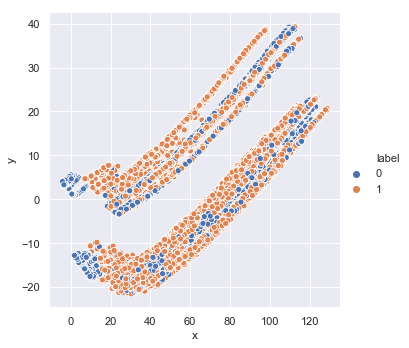

In [25]:
# import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

dataset = pd.DataFrame(data=dataset, columns=['x', 'y'])
dataset['label'] = model_train_df['Is_in_day_consume']

sns.relplot(x="x", y="y", hue="label", data=dataset);

+ PCA降维之后的2维数据应该通过展示的方式来查看如果分类

In [ ]:
from sklearn.metrics import roc_curve, auc
import numpy as np
import math

def evaluate(result_df):
    group = result_df.groupby(['Coupon_id'])
    aucs = []
    for i in group:
        tmpdf = i[1]        
        if len(tmpdf['Is_in_day_consume'].unique()) != 2:
            continue
            
        fpr, tpr, thresholds = roc_curve(tmpdf['Is_in_day_consume'], tmpdf['Probability'], pos_label=1)
        auc_score = auc(fpr,tpr)
        aucs.append(auc_score)
            
    return np.average(aucs)

In [ ]:
predict_test_prob_y = pipe_lr.predict_proba(model_test_df[fields+continous])
model_test_df['Probability'] = predict_test_prob_y[:, 1]

In [ ]:
evaluate(model_test_df)

In [ ]:
model_pred_df = pd.read_csv('lcm_test_features.csv')
predict_prob_y = pipe_lr.predict_proba(model_pred_df[fields+continous])
model_pred_df['Probability'] = predict_prob_y[:, 1]
model_pred_df.sort_values(['Probability'], ascending=False).head()

In [ ]:
final_result_df = model_pred_df[['User_id', 'Coupon_id', 'Date_received', 'Probability']]
final_result_df.to_csv('/Users/leewind/Desktop/submission_20190118.csv', index=False, header=False)
final_result_df.shape